# Goal of this notebook

This Notebook does a single Analysis for one dataset to see what data is relevant and what data is not.

Write down the definition of setlment prices.

Note, in the dataset weekends are not included.


Country | Trading Day | Delivery Day | Settlment Price(on Trading Day) | Open Volume

Only include existing lags into the model[1,2,3,4,5,6]

In [60]:
import pandas as pd
from datetime import datetime, timedelta
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.api import VAR
import seaborn as sns
import plotly.figure_factory as ff
import numpy as np
from scipy.stats import norm
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [2]:
ger_2021 = pd.read_excel('Data/PowerFutureHistory_Phelix-DE_2021-2023/PowerFutureHistory_Phelix-DE_2021.xlsx', sheet_name='DB01-34',skiprows=2)

In [3]:
ger_2021.head(5)

,Trading Day,Product,Maturity,Delivery Start,Delivery End,Lot Size,Settlement Price,Open Price,Timestamp Open Price,High Price,...,Last Price,Timestamp Last Price,Traded Lots,Traded Volume,Number of Trades,Open Interest Volume,Open Interest Lots,Traded Lots.1,Traded Volume.1,Number of Trades.1
0,2021-12-31,DB01,2022-01,2022-01-01,2022-01-01,24,75.33,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4200.0,175.0,NaN,NaN,NaN
1,2021-12-31,DB02,2022-01,2022-01-02,2022-01-02,24,64.77,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-12-31,DB03,2022-01,2022-01-03,2022-01-03,24,108.90,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1320.0,55.0,NaN,NaN,NaN
3,2021-12-31,DB04,2022-01,2022-01-04,2022-01-04,24,172.34,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-12-31,DB05,2022-01,2022-01-05,2022-01-05,24,172.19,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We only care about rows that have a settlment price. 

We only care about the settlment price.

In [4]:
ger_2021.columns

Index(['Trading Day', 'Product', 'Maturity', 'Delivery Start', 'Delivery End',
       'Lot Size', 'Settlement Price', 'Open Price', 'Timestamp Open Price ',
       'High Price', 'Timestamp High Price', 'Low Price',
       'Timestamp Low Price', 'Last  Price', 'Timestamp Last Price',
       'Traded Lots', 'Traded Volume', 'Number of Trades',
       'Open Interest Volume', 'Open Interest Lots', 'Traded Lots.1',
       'Traded Volume.1', 'Number of Trades.1'],
      dtype='object')

In [5]:
# drop all the irreleveant columns
ger_2021 = ger_2021[['Trading Day', 'Product', 'Maturity', 'Delivery Start', 'Delivery End',
       'Lot Size', 'Settlement Price','Open Interest Volume', 'Open Interest Lots']]

In [6]:
# drop all the nan settlement price columns
ger_2021.dropna(subset=['Settlement Price'],inplace=True)

In [7]:
ger_2021[abs(ger_2021['Trading Day'].values - ger_2021['Delivery End'].values)==np.timedelta64(1, 'D')].sort_values('Trading Day')

,Trading Day,Product,Maturity,Delivery Start,Delivery End,Lot Size,Settlement Price,Open Interest Volume,Open Interest Lots
3410,2021-01-04,DB05,2021-01,2021-01-05,2021-01-05,24,55.34,35280.0,1470.0
3408,2021-01-04,DB03,2021-01,2021-01-03,2021-01-03,24,38.62,600.0,25.0
3386,2021-01-05,DB06,2021-01,2021-01-06,2021-01-06,24,52.68,45840.0,1910.0
3373,2021-01-06,DB07,2021-01,2021-01-07,2021-01-07,24,70.93,36000.0,1500.0
3361,2021-01-07,DB08,2021-01,2021-01-08,2021-01-08,24,78.34,93144.0,3881.0
...,...,...,...,...,...,...,...,...,...
47,2021-12-27,DB26,2021-12,2021-12-26,2021-12-26,24,172.46,NaN,NaN
33,2021-12-28,DB29,2021-12,2021-12-29,2021-12-29,24,155.60,53208.0,2217.0
21,2021-12-29,DB30,2021-12,2021-12-30,2021-12-30,24,73.26,47904.0,1996.0
10,2021-12-30,DB31,2021-12,2021-12-31,2021-12-31,24,12.13,28392.0,1183.0


In [8]:
differences =  ger_2021['Delivery End'].values - ger_2021['Trading Day'].values
ger_2021['DayDifference'] = differences/ np.timedelta64(1, 'D')

In [9]:
ger_2021

,Trading Day,Product,Maturity,Delivery Start,Delivery End,Lot Size,Settlement Price,Open Interest Volume,Open Interest Lots,DayDifference
0,2021-12-31,DB01,2022-01,2022-01-01,2022-01-01,24,75.33,4200.0,175.0,1.0
1,2021-12-31,DB02,2022-01,2022-01-02,2022-01-02,24,64.77,NaN,NaN,2.0
2,2021-12-31,DB03,2022-01,2022-01-03,2022-01-03,24,108.90,1320.0,55.0,3.0
3,2021-12-31,DB04,2022-01,2022-01-04,2022-01-04,24,172.34,NaN,NaN,4.0
4,2021-12-31,DB05,2022-01,2022-01-05,2022-01-05,24,172.19,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...
3411,2021-01-04,DB06,2021-01,2021-01-06,2021-01-06,24,56.03,12600.0,525.0,2.0
3412,2021-01-04,DB07,2021-01,2021-01-07,2021-01-07,24,69.25,10320.0,430.0,3.0
3413,2021-01-04,DB08,2021-01,2021-01-08,2021-01-08,24,71.38,14400.0,600.0,4.0
3414,2021-01-04,DB09,2021-01,2021-01-09,2021-01-09,24,55.31,NaN,NaN,5.0


In [10]:
#Only look at relevant columns
ger_2021 = ger_2021[(ger_2021.DayDifference > 0) & (ger_2021.DayDifference< 7)]

In [11]:
ger_2021

,Trading Day,Product,Maturity,Delivery Start,Delivery End,Lot Size,Settlement Price,Open Interest Volume,Open Interest Lots,DayDifference
0,2021-12-31,DB01,2022-01,2022-01-01,2022-01-01,24,75.33,4200.0,175.0,1.0
1,2021-12-31,DB02,2022-01,2022-01-02,2022-01-02,24,64.77,NaN,NaN,2.0
2,2021-12-31,DB03,2022-01,2022-01-03,2022-01-03,24,108.90,1320.0,55.0,3.0
3,2021-12-31,DB04,2022-01,2022-01-04,2022-01-04,24,172.34,NaN,NaN,4.0
4,2021-12-31,DB05,2022-01,2022-01-05,2022-01-05,24,172.19,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...
3411,2021-01-04,DB06,2021-01,2021-01-06,2021-01-06,24,56.03,12600.0,525.0,2.0
3412,2021-01-04,DB07,2021-01,2021-01-07,2021-01-07,24,69.25,10320.0,430.0,3.0
3413,2021-01-04,DB08,2021-01,2021-01-08,2021-01-08,24,71.38,14400.0,600.0,4.0
3414,2021-01-04,DB09,2021-01,2021-01-09,2021-01-09,24,55.31,NaN,NaN,5.0


# Make aggregated Dataframe pandas

In [12]:
ch_2021 = pd.read_excel('Data/PowerFutureHistory_CH_2021-2023/PowerFutureHistory_CH_2021.xlsx', sheet_name='FC01-34',skiprows=2)
ch_2022 = pd.read_excel('Data/PowerFutureHistory_CH_2021-2023/PowerFutureHistory_CH_2022.xlsx', sheet_name='FC01-34',skiprows=2)
ch_2023 = pd.read_excel('Data/PowerFutureHistory_CH_2021-2023/PowerFutureHistory_CH_2023.xlsx', sheet_name='FC01-34',skiprows=2)
ch_2021['Country'] = 'CH'
ch_2022['Country'] = 'CH'
ch_2023['Country'] = 'CH'

In [13]:
it_2021 = pd.read_excel('Data/PowerFutureHistory_IT_2021-2023/PowerFutureHistory_IT_2021.xlsx', sheet_name='FD01-34',skiprows=2)
it_2022 = pd.read_excel('Data/PowerFutureHistory_IT_2021-2023/PowerFutureHistory_IT_2022.xlsx', sheet_name='FD01-34',skiprows=2)
it_2023 = pd.read_excel('Data/PowerFutureHistory_IT_2021-2023/PowerFutureHistory_IT_2023.xlsx', sheet_name='FD01-34',skiprows=2)
it_2021['Country'] = 'IT'
it_2022['Country'] = 'IT'
it_2023['Country'] = 'IT'

In [14]:
cz_2021 = pd.read_excel('Data/PowerFutureHistory_CZ_2021-2023/PowerFutureHistory_CZ_2021.xlsx', sheet_name='FX01-34',skiprows=2)
cz_2022 = pd.read_excel('Data/PowerFutureHistory_CZ_2021-2023/PowerFutureHistory_CZ_2022.xlsx', sheet_name='FX01-34',skiprows=2)
cz_2023 = pd.read_excel('Data/PowerFutureHistory_CZ_2021-2023/PowerFutureHistory_CZ_2023.xlsx', sheet_name='FX01-34',skiprows=2)
cz_2021['Country'] = 'CZ'
cz_2022['Country'] = 'CZ'
cz_2023['Country'] = 'CZ'

In [15]:
nl_2021 = pd.read_excel('Data/PowerFutureHistory_NL_2021-2023/PowerFutureHistory_NL_2021.xlsx', sheet_name='QB01-34',skiprows=2)
nl_2022 = pd.read_excel('Data/PowerFutureHistory_NL_2021-2023/PowerFutureHistory_NL_2022.xlsx', sheet_name='QB01-34',skiprows=2)
nl_2023 = pd.read_excel('Data/PowerFutureHistory_NL_2021-2023/PowerFutureHistory_NL_2023.xlsx', sheet_name='QB01-34',skiprows=2)
nl_2021['Country'] = 'NL'
nl_2022['Country'] = 'NL'
nl_2023['Country'] = 'NL'

In [16]:
es_2021 = pd.read_excel('Data/PowerFutureHistory_ES_2021-2023/PowerFutureHistory_ES_2021.xlsx', sheet_name='FE01-34',skiprows=2)
es_2022 = pd.read_excel('Data/PowerFutureHistory_ES_2021-2023/PowerFutureHistory_ES_2022.xlsx', sheet_name='FE01-34',skiprows=2)
es_2023 = pd.read_excel('Data/PowerFutureHistory_ES_2021-2023/PowerFutureHistory_ES_2023.xlsx', sheet_name='FE01-34',skiprows=2)
es_2021['Country'] = 'ES'
es_2022['Country'] = 'ES'
es_2023['Country'] = 'ES'

In [17]:
fr_2021 = pd.read_excel('Data/PowerFutureHistory_FR_2021-2023/PowerFutureHistory_FR_2021.xlsx', sheet_name='F701-34',skiprows=2)
fr_2022 = pd.read_excel('Data/PowerFutureHistory_FR_2021-2023/PowerFutureHistory_FR_2022.xlsx', sheet_name='F701-34',skiprows=2)
fr_2023 = pd.read_excel('Data/PowerFutureHistory_FR_2021-2023/PowerFutureHistory_FR_2023.xlsx', sheet_name='F701-34',skiprows=2)
fr_2021['Country'] = 'FR'
fr_2022['Country'] = 'FR'
fr_2023['Country'] = 'FR'

In [18]:
at_2021 = pd.read_excel('Data/PowerFutureHistory_Phelix-AT_2021-2023/PowerFutureHistory_Phelix-AT_2021.xlsx', sheet_name='AB01-34',skiprows=2)
at_2022 = pd.read_excel('Data/PowerFutureHistory_Phelix-AT_2021-2023/PowerFutureHistory_Phelix-AT_2022.xlsx', sheet_name='AB01-34',skiprows=2)
at_2023 = pd.read_excel('Data/PowerFutureHistory_Phelix-AT_2021-2023/PowerFutureHistory_Phelix-AT_2023.xlsx', sheet_name='AB01-34',skiprows=2)
at_2021['Country'] = 'AT'
at_2022['Country'] = 'AT'
at_2023['Country'] = 'AT'

In [19]:
gb_2021 = pd.read_excel('Data/PowerFutureHistory_GB_2021-2023/PowerFutureHistory_GB_2021.xlsx', sheet_name='FU01-34',skiprows=2)
gb_2022 = pd.read_excel('Data/PowerFutureHistory_GB_2021-2023/PowerFutureHistory_GB_2022.xlsx', sheet_name='FU01-34',skiprows=2)
gb_2023 = pd.read_excel('Data/PowerFutureHistory_GB_2021-2023/PowerFutureHistory_GB_2023.xlsx', sheet_name='FU01-34',skiprows=2)
gb_2021['Country'] = 'GB'
gb_2022['Country'] = 'GB'
gb_2023['Country'] = 'GB'

In [20]:
ger_2021 = pd.read_excel('Data/PowerFutureHistory_Phelix-DE_2021-2023/PowerFutureHistory_Phelix-DE_2021.xlsx', sheet_name='DB01-34',skiprows=2)
ger_2022 = pd.read_excel('Data/PowerFutureHistory_Phelix-DE_2021-2023/PowerFutureHistory_Phelix-DE_2022.xlsx', sheet_name='DB01-34',skiprows=2)
ger_2023 = pd.read_excel('Data/PowerFutureHistory_Phelix-DE_2021-2023/PowerFutureHistory_Phelix-DE_2023.xlsx', sheet_name='DB01-34',skiprows=2)
ger_2021['Country'] = 'GER'
ger_2022['Country'] = 'GER'
ger_2023['Country'] = 'GER'

In [21]:
hu_2021 = pd.read_excel('Data/PowerFutureHistory_HU_2021-2023/PowerFutureHistory_HU_2021.xlsx', sheet_name='F901-34',skiprows=2)
hu_2022 = pd.read_excel('Data/PowerFutureHistory_HU_2021-2023/PowerFutureHistory_HU_2022.xlsx', sheet_name='F901-34',skiprows=2)
hu_2023 = pd.read_excel('Data/PowerFutureHistory_HU_2021-2023/PowerFutureHistory_HU_2023.xlsx', sheet_name='F901-34',skiprows=2)
hu_2021['Country'] = 'HU'
hu_2022['Country'] = 'HU'
hu_2023['Country'] = 'HU'

In [22]:
big_df = pd.concat([ch_2021, ch_2022,ch_2023,it_2021,it_2022,it_2023,cz_2021 ,cz_2022,cz_2023,nl_2021,nl_2022,nl_2023,es_2021,es_2022,es_2023,fr_2021,fr_2022,fr_2023,at_2021,at_2022,at_2023,gb_2021,gb_2022,gb_2023,ger_2021,ger_2022,ger_2023,hu_2021,hu_2022,hu_2023])

In [23]:
differences =  big_df['Delivery End'].values - big_df['Trading Day'].values
big_df['DayDifference'] = differences/ np.timedelta64(1, 'D')

In [24]:
#Only look at relevant columns
big_df = big_df[(big_df.DayDifference > 0) & (big_df.DayDifference< 7)]

In [25]:
# drop all the nan settlement price columns
big_df.dropna(subset=['Settlement Price'],inplace=True)

In [26]:
big_df

,Trading Day,Product,Maturity,Delivery Start,Delivery End,Lot Size,Settlement Price,Open Price,Timestamp Open Price,High Price,...,Traded Lots,Traded Volume,Number of Trades,Open Interest Volume,Open Interest Lots,Traded Lots.1,Traded Volume.1,Number of Trades.1,Country,DayDifference
0,2021-12-31,FC01,2022-01,2022-01-01,2022-01-01,24.0,105.86,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CH,1.0
1,2021-12-31,FC02,2022-01,2022-01-02,2022-01-02,24.0,92.14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CH,2.0
2,2021-12-31,FC03,2022-01,2022-01-03,2022-01-03,24.0,152.14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CH,3.0
3,2021-12-31,FC04,2022-01,2022-01-04,2022-01-04,24.0,211.77,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CH,4.0
4,2021-12-31,FC05,2022-01,2022-01-05,2022-01-05,24.0,211.77,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CH,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,2023-01-02,F904,2023-01,2023-01-04,2023-01-04,24.0,106.13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HU,2.0
3153,2023-01-02,F905,2023-01,2023-01-05,2023-01-05,24.0,143.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HU,3.0
3154,2023-01-02,F906,2023-01,2023-01-06,2023-01-06,24.0,144.60,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HU,4.0
3155,2023-01-02,F907,2023-01,2023-01-07,2023-01-07,24.0,139.48,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HU,5.0


In [27]:
# drop all the irreleveant columns
big_df = big_df[['Trading Day', 'Maturity', 'Delivery Start', 'Delivery End',
       'Lot Size', 'Settlement Price','Open Interest Volume', 'Open Interest Lots','Country','DayDifference']]

In [28]:
big_df.reset_index(inplace=True)

In [29]:
big_df

,index,Trading Day,Maturity,Delivery Start,Delivery End,Lot Size,Settlement Price,Open Interest Volume,Open Interest Lots,Country,DayDifference
0,0,2021-12-31,2022-01,2022-01-01,2022-01-01,24.0,105.86,NaN,NaN,CH,1.0
1,1,2021-12-31,2022-01,2022-01-02,2022-01-02,24.0,92.14,NaN,NaN,CH,2.0
2,2,2021-12-31,2022-01,2022-01-03,2022-01-03,24.0,152.14,NaN,NaN,CH,3.0
3,3,2021-12-31,2022-01,2022-01-04,2022-01-04,24.0,211.77,NaN,NaN,CH,4.0
4,4,2021-12-31,2022-01,2022-01-05,2022-01-05,24.0,211.77,NaN,NaN,CH,5.0
...,...,...,...,...,...,...,...,...,...,...,...
46085,3152,2023-01-02,2023-01,2023-01-04,2023-01-04,24.0,106.13,NaN,NaN,HU,2.0
46086,3153,2023-01-02,2023-01,2023-01-05,2023-01-05,24.0,143.00,NaN,NaN,HU,3.0
46087,3154,2023-01-02,2023-01,2023-01-06,2023-01-06,24.0,144.60,NaN,NaN,HU,4.0
46088,3155,2023-01-02,2023-01,2023-01-07,2023-01-07,24.0,139.48,NaN,NaN,HU,5.0


In [30]:
big_df.sort_values(by='Trading Day',inplace=True)

/var/folders/x4/4mqqdmr15ns_x0tn1xzv7q5h0000gn/T/ipykernel_6618/1236106040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df.sort_values(by='Trading Day',inplace=True)


In [79]:
big_df.to_csv('big_df.csv')

# Base check for Granger Causality in 1 Day Lag

In [31]:
one_day_lag = pd.DataFrame()
for name, group in big_df[big_df.DayDifference==1].groupby('Country'):
    one_day_lag[name] = group['Settlement Price']
    

In [32]:
one_day_lag.info()

<class 'pandas.core.frame.DataFrame'>
Index: 769 entries, 29191 to 30740
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      769 non-null    float64
 1   CH      0 non-null      float64
 2   CZ      0 non-null      float64
 3   ES      0 non-null      float64
 4   FR      0 non-null      float64
 5   GB      0 non-null      float64
 6   GER     0 non-null      float64
 7   HU      0 non-null      float64
 8   IT      0 non-null      float64
 9   NL      0 non-null      float64
dtypes: float64(10)
memory usage: 66.1 KB


In [33]:
big_df[big_df.DayDifference==1]

,index,Trading Day,Maturity,Delivery Start,Delivery End,Lot Size,Settlement Price,Open Interest Volume,Open Interest Lots,Country,DayDifference
1536,3411,2021-01-04,2021-01,2021-01-05,2021-01-05,24.0,58.72,NaN,NaN,CH,1.0
29191,3411,2021-01-04,2021-01,2021-01-05,2021-01-05,24.0,57.29,NaN,NaN,AT,1.0
43012,3417,2021-01-04,2021-01,2021-01-05,2021-01-05,24.0,52.32,3120.0,130.0,HU,1.0
38406,3410,2021-01-04,2021-01,2021-01-05,2021-01-05,24.0,55.34,35280.0,1470.0,GER,1.0
19971,3411,2021-01-04,2021-01,2021-01-05,2021-01-05,24.0,67.55,3480.0,145.0,ES,1.0
...,...,...,...,...,...,...,...,...,...,...,...
26133,2,2023-12-29,2024-01,2023-12-30,2023-12-30,24.0,35.02,33600.0,1400.0,FR,1.0
35354,8,2023-12-29,2024-01,2023-12-30,2023-12-30,24.0,59.36,NaN,NaN,GB,1.0
39953,2,2023-12-29,2024-01,2023-12-30,2023-12-30,24.0,34.06,38520.0,1605.0,GER,1.0
16912,2,2023-12-29,2024-01,2023-12-30,2023-12-30,24.0,46.60,NaN,NaN,NL,1.0


In [34]:
Counter(big_df.Country)

Counter({'HU': 4618,
         'CH': 4614,
         'ES': 4614,
         'IT': 4613,
         'GB': 4613,
         'FR': 4612,
         'NL': 4607,
         'AT': 4606,
         'CZ': 4601,
         'GER': 4592})

In [35]:
one_day_lag = big_df.pivot_table(index='Trading Day', columns='Country', values='Settlement Price')

# Display the first few rows of the pivoted dataframe
one_day_lag.head()

Country,AT,CH,CZ,ES,FR,GB,GER,HU,IT,NL
Trading Day,,,,,,,,,,
2021-01-04,59.506667,63.036667,58.071667,57.675000,66.340000,71.171667,59.316667,58.355000,62.305000,58.930000
2021-01-05,58.640000,62.320000,56.165000,63.950000,66.813333,77.598333,56.990000,57.071667,60.991667,56.368333
2021-01-06,59.465000,66.510000,60.586667,74.221667,72.451667,70.638333,60.933333,61.405000,68.668333,57.505000
2021-01-07,58.203333,66.736667,60.065000,85.378333,72.433333,72.588333,59.106667,61.710000,67.983333,58.390000
2021-01-08,58.171667,64.428333,58.593333,89.016667,66.460000,66.710000,56.390000,58.560000,66.425000,56.523333


In [36]:
one_day_lag

Country,AT,CH,CZ,ES,FR,GB,GER,HU,IT,NL
Trading Day,,,,,,,,,,
2021-01-04,59.506667,63.036667,58.071667,57.675000,66.340000,71.171667,59.316667,58.355000,62.305000,58.930000
2021-01-05,58.640000,62.320000,56.165000,63.950000,66.813333,77.598333,56.990000,57.071667,60.991667,56.368333
2021-01-06,59.465000,66.510000,60.586667,74.221667,72.451667,70.638333,60.933333,61.405000,68.668333,57.505000
2021-01-07,58.203333,66.736667,60.065000,85.378333,72.433333,72.588333,59.106667,61.710000,67.983333,58.390000
2021-01-08,58.171667,64.428333,58.593333,89.016667,66.460000,66.710000,56.390000,58.560000,66.425000,56.523333
...,...,...,...,...,...,...,...,...,...,...
2023-12-21,37.245000,57.240000,29.484000,55.600000,24.833333,39.246667,28.048000,37.936667,91.551667,42.951667
2023-12-22,38.123333,52.736667,43.892500,52.735000,24.730000,45.963333,45.372500,39.511667,95.966667,40.148333
2023-12-27,44.953333,56.636667,27.228333,69.263333,30.525000,50.911667,25.501667,41.310000,99.520000,46.386667


In [37]:
# Calculate the simple percentage returns
one_day_lag_returns = one_day_lag.pct_change().dropna()

# Display the first few rows of the returns DataFrame
one_day_lag_returns = one_day_lag_returns.reset_index()

/var/folders/x4/4mqqdmr15ns_x0tn1xzv7q5h0000gn/T/ipykernel_6618/1110085452.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  one_day_lag_returns = one_day_lag.pct_change().dropna()


In [81]:
one_day_lag_returns.to_csv('one_day_lag_return.csv')

In [38]:
one_day_lag_returns.columns

Index(['Trading Day', 'AT', 'CH', 'CZ', 'ES', 'FR', 'GB', 'GER', 'HU', 'IT',
       'NL'],
      dtype='object', name='Country')

In [39]:
one_day_lag_returns.dropna()

Country,Trading Day,AT,CH,CZ,ES,FR,GB,GER,HU,IT,NL
0,2021-01-05,-0.014564,-0.011369,-0.032833,0.108799,0.007135,0.090298,-0.039225,-0.021992,-0.021079,-0.043470
1,2021-01-06,0.014069,0.067234,0.078726,0.160620,0.084389,-0.089693,0.069193,0.075928,0.125864,0.020165
2,2021-01-07,-0.021217,0.003408,-0.008610,0.150315,-0.000253,0.027605,-0.029978,0.004967,-0.009975,0.015390
3,2021-01-08,-0.000544,-0.034589,-0.024501,0.042614,-0.082467,-0.080982,-0.045962,-0.051045,-0.022922,-0.031969
4,2021-01-11,0.004899,-0.006571,0.042354,-0.072739,-0.048149,0.015465,0.000089,0.198600,0.010061,0.016041
...,...,...,...,...,...,...,...,...,...,...,...
764,2023-12-21,0.364369,0.036581,0.005319,0.020808,0.302903,0.062396,0.432665,-0.095885,0.016619,0.126650
765,2023-12-22,0.023583,-0.078675,0.488689,-0.051529,-0.004161,0.171140,0.617673,0.041517,0.048224,-0.065267
766,2023-12-27,0.179155,0.073952,-0.379659,0.313422,0.234331,0.107658,-0.437949,0.045514,0.037027,0.155382
767,2023-12-28,-0.033887,-0.155847,0.200282,-0.099018,0.128911,0.146627,0.249526,-0.017591,0.037731,-0.065213


In [41]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# Assuming df_pivot is your pivoted DataFrame from the previous steps
# Make sure the index is in datetime format

# Drop any rows with NaN values for simplicity
one_day_lag_returns = one_day_lag_returns.dropna()

# List of all countries (columns)
countries = ['AT', 'CH', 'CZ', 'ES', 'FR', 'GB', 'GER', 'HU', 'IT', 'NL']

# Dictionary to store results
granger_results = {}

# Perform Granger causality tests for all pairs of countries
for country1 in countries:
    for country2 in countries:
        if country1 != country2:
            test_result = grangercausalitytests(one_day_lag_returns[[country1, country2]], maxlag=4, verbose=False)
            granger_results[(country1, country2)] = test_result

# Example: Check results for a specific pair
country_pair = ('FR', 'GER')  # Example: France and Germany
if country_pair in granger_results:
    print(f"Granger causality results for {country_pair[0]} causing {country_pair[1]}:")
    for lag, result in granger_results[country_pair].items():
        print(f"Lag {lag}:", result[0]['ssr_chi2test'])

/Users/juliusgruber/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/juliusgruber/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/juliusgruber/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/juliusgruber/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/juliusgruber/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/juliusgruber/anaconda3/lib/python3.11/site-packa

Granger causality results for FR causing GER:
Lag 1: (16.303787819540762, 5.395598994919745e-05, 1)
Lag 2: (16.03377878540998, 0.00032984444523766725, 2)
Lag 3: (13.923423147822467, 0.0030112618059335997, 3)
Lag 4: (14.452866996872029, 0.005981517794432177, 4)


/Users/juliusgruber/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/juliusgruber/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/juliusgruber/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/juliusgruber/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/juliusgruber/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/juliusgruber/anaconda3/lib/python3.11/site-packa

In [42]:
# Example: Check results for a specific pair
country_pair = ('GER', 'IT')  # Example: France and Germany
if country_pair in granger_results:
    print(f"Granger causality results for {country_pair[0]} causing {country_pair[1]}:")
    for lag, result in granger_results[country_pair].items():
        print(f"Lag {lag}:", result[0]['ssr_chi2test'])

Granger causality results for GER causing IT:
Lag 1: (0.4246051003018103, 0.5146480872431478, 1)
Lag 2: (3.859660201625786, 0.14517286113957942, 2)
Lag 3: (5.553060705134419, 0.13549922026631372, 3)
Lag 4: (7.074481453309701, 0.13200418282526893, 4)


In [43]:
#get this into a correlation matrix format with p values

In [67]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Assuming one_day_lag_returns is your DataFrame with returns and the index is properly set

# List of all countries (columns)
countries = ['AT', 'CH', 'CZ', 'ES', 'FR', 'GB', 'GER', 'HU', 'IT', 'NL']

# Initialize empty DataFrames for each lag (1 to 4)
lag_matrices = {lag: pd.DataFrame(index=countries, columns=countries) for lag in range(1, 5)}

# Perform Granger causality tests for all pairs of countries and all lags
for country1 in countries:
    for country2 in countries:
        if country1 != country2:
            test_result = grangercausalitytests(one_day_lag_returns[[country1, country2]], maxlag=4, verbose=False)
            for lag in range(1, 5):
                p_value = test_result[lag][0]['ssr_chi2test'][1]
                lag_matrices[lag].loc[country1, country2] = p_value

# Display the matrices for each lag
for lag, matrix in lag_matrices.items():
    print(f"P-value Matrix for Lag {lag}:")
    print(matrix)
    print("\n")



/Users/juliusgruber/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/Users/juliusgruber/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/Users/juliusgruber/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/Users/juliusgruber/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/Users/juliusgruber/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/Users/juliusgruber/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecate

P-value Matrix for Lag 1:
           AT        CH        CZ        ES        FR        GB       GER  \
AT        NaN  0.036375       0.0  0.949462  0.000877  0.192547       0.0   
CH    0.00235       NaN       0.0  0.778052       0.0  0.095632       0.0   
CZ   0.000074  0.235628       NaN  0.553091  0.001026  0.465335  0.006505   
ES   0.000881   0.14591  0.000655       NaN  0.016758  0.109788  0.000067   
FR   0.022477  0.811225  0.000012  0.776678       NaN  0.748352  0.000054   
GB   0.000375  0.000214  0.000787  0.336691  0.000008       NaN  0.000026   
GER  0.002098  0.609401  0.598711  0.377902  0.148359  0.272068       NaN   
HU   0.000307  0.000112       0.0  0.049827       0.0   0.37804       0.0   
IT   0.000431  0.000019  0.000005  0.004483  0.000015  0.267169  0.000001   
NL        0.0       0.0       0.0   0.71828       0.0  0.490239       0.0   

           HU        IT        NL  
AT   0.005757  0.000104   0.00469  
CH   0.000001       0.0   0.03799  
CZ    0.26636   0.

/Users/juliusgruber/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/Users/juliusgruber/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/Users/juliusgruber/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/Users/juliusgruber/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/Users/juliusgruber/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecated since functions should not print results

/Users/juliusgruber/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning:

verbose is deprecate

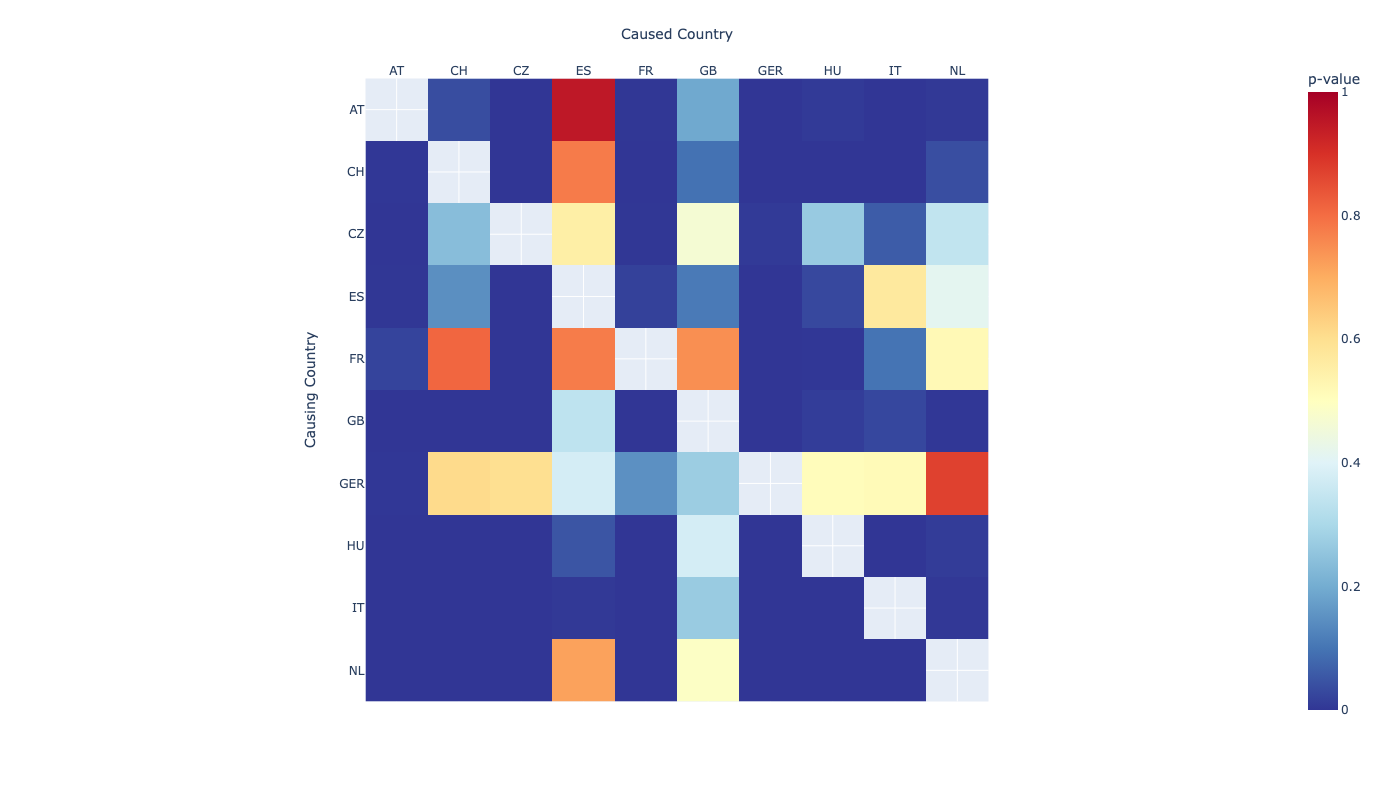

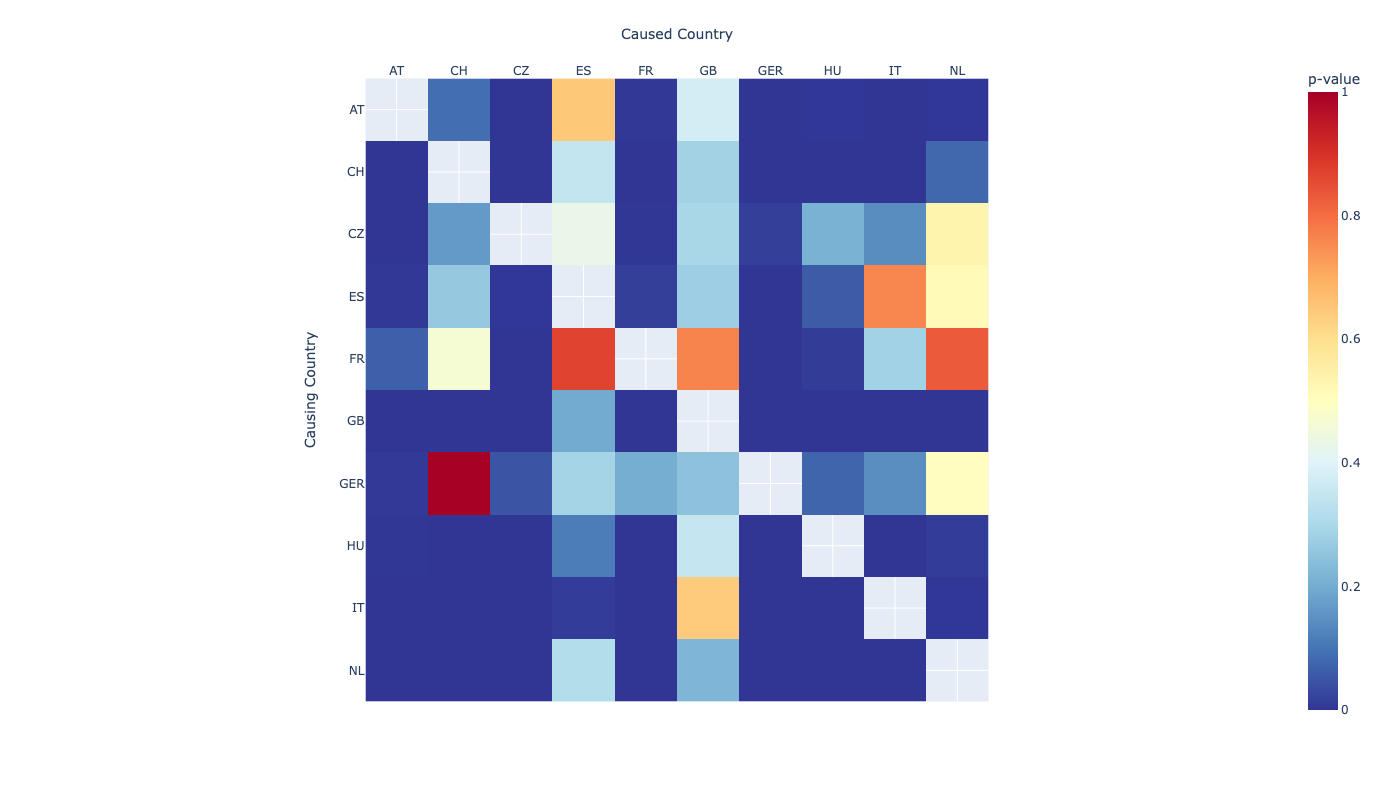

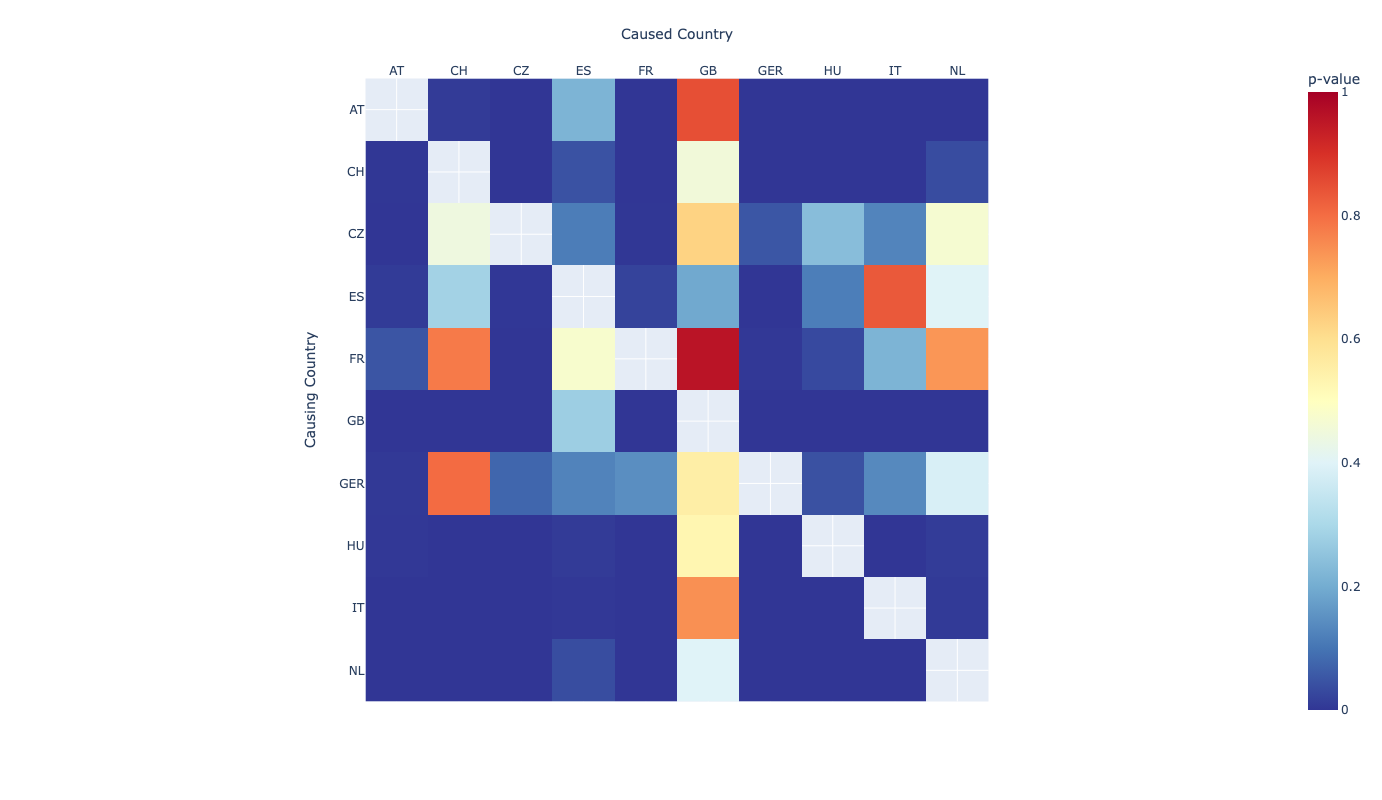

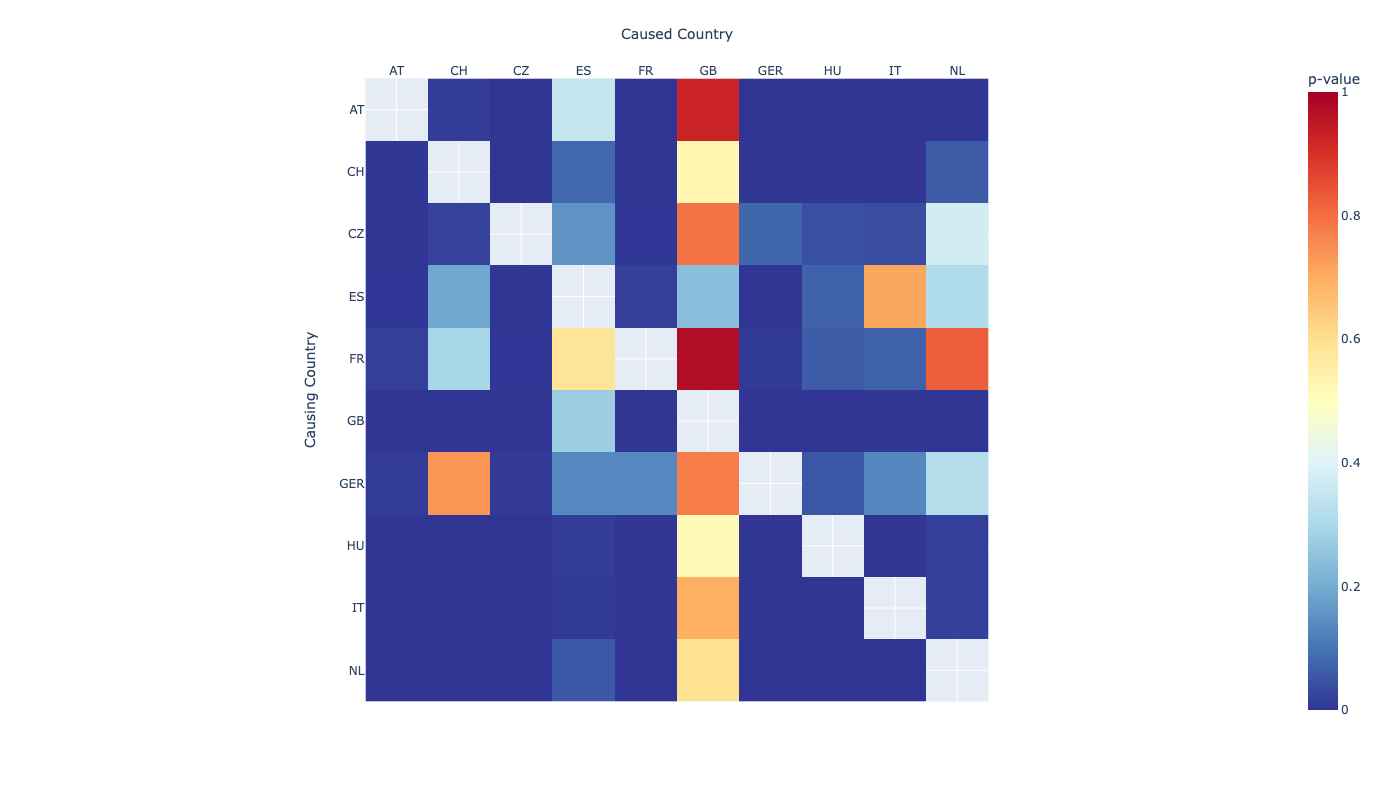

In [69]:
# Assuming `lag_matrices` is a dictionary where keys are lags and values are p-value matrices
# And `countries` is a list of country names corresponding to the rows/columns of the matrices

# Plot the matrices for each lag using Plotly
for lag, matrix in lag_matrices.items():
    fig = px.imshow(matrix.astype(float), 
                    labels=dict(x="Caused Country", y="Causing Country", color="p-value"),
                    x=countries,
                    y=countries,
                    color_continuous_scale="RdYlBu_r",
                    zmin=0, zmax=1)
                    #title=f"Granger Causality p-value Matrix for Lag {lag}")
    fig.update_xaxes(side="top")
    
    # Update layout to make the figures bigger
    fig.update_layout(
        width=800,  # Adjust the width of the figure
        height=800, # Adjust the height of the figure
        title_font_size=18,  # Adjust the title font size
        xaxis_title_font_size=14,  # Adjust the x-axis title font size
        yaxis_title_font_size=14   # Adjust the y-axis title font size
    )
    
    fig.show()

# Check coefficients of the VAR model

In [46]:
one_day_lag_returns[countries]

Country,AT,CH,CZ,ES,FR,GB,GER,HU,IT,NL
0,-0.014564,-0.011369,-0.032833,0.108799,0.007135,0.090298,-0.039225,-0.021992,-0.021079,-0.043470
1,0.014069,0.067234,0.078726,0.160620,0.084389,-0.089693,0.069193,0.075928,0.125864,0.020165
2,-0.021217,0.003408,-0.008610,0.150315,-0.000253,0.027605,-0.029978,0.004967,-0.009975,0.015390
3,-0.000544,-0.034589,-0.024501,0.042614,-0.082467,-0.080982,-0.045962,-0.051045,-0.022922,-0.031969
4,0.004899,-0.006571,0.042354,-0.072739,-0.048149,0.015465,0.000089,0.198600,0.010061,0.016041
...,...,...,...,...,...,...,...,...,...,...
764,0.364369,0.036581,0.005319,0.020808,0.302903,0.062396,0.432665,-0.095885,0.016619,0.126650
765,0.023583,-0.078675,0.488689,-0.051529,-0.004161,0.171140,0.617673,0.041517,0.048224,-0.065267
766,0.179155,0.073952,-0.379659,0.313422,0.234331,0.107658,-0.437949,0.045514,0.037027,0.155382
767,-0.033887,-0.155847,0.200282,-0.099018,0.128911,0.146627,0.249526,-0.017591,0.037731,-0.065213


In [47]:
coefficients

NameError: name 'coefficients' is not defined

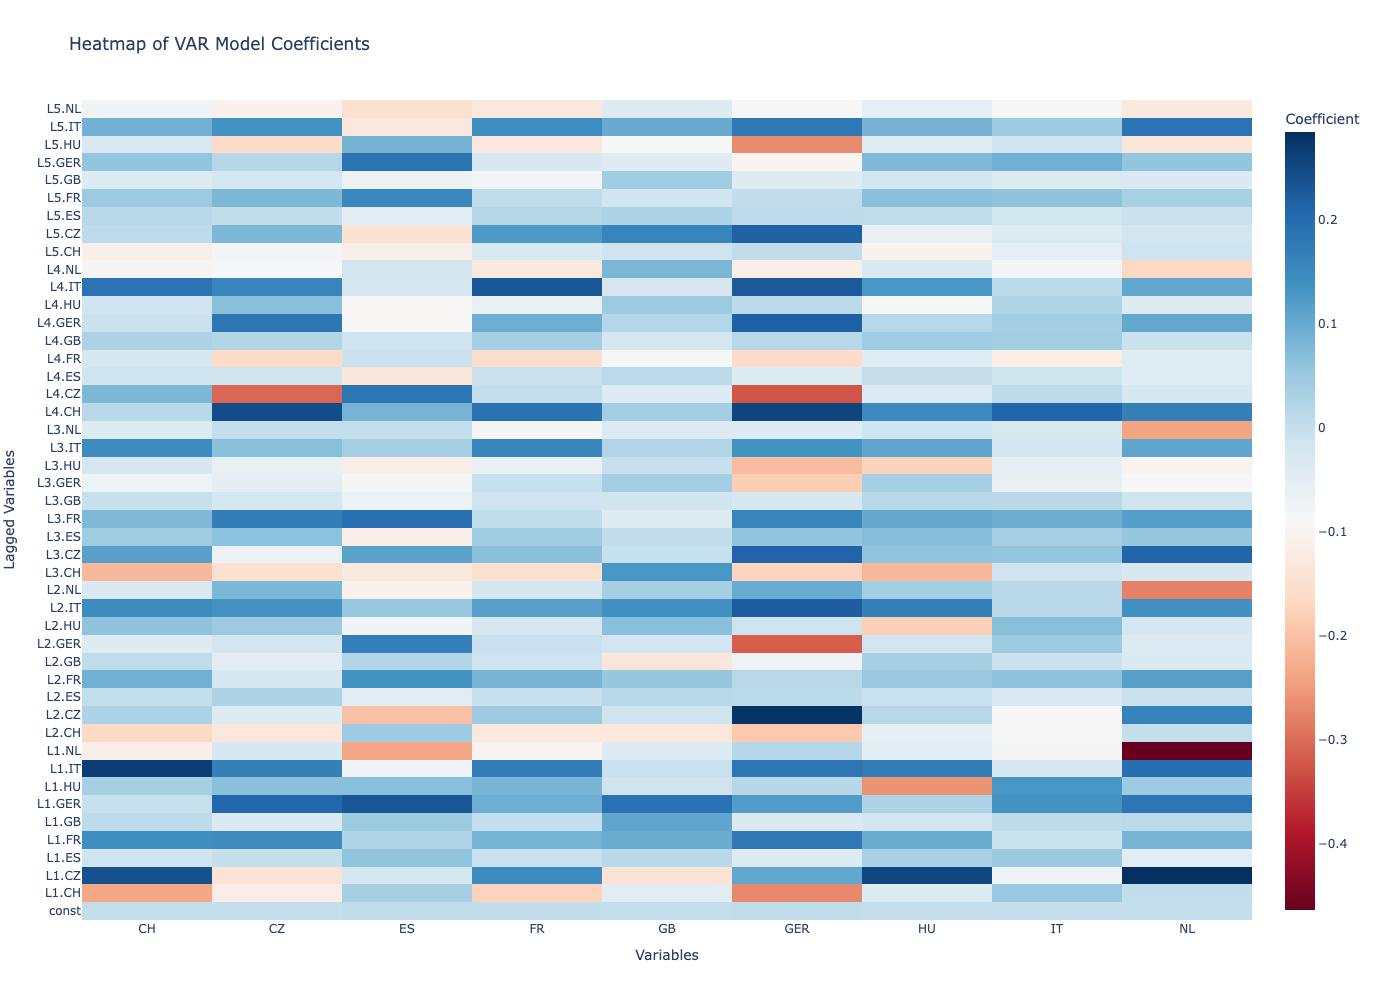

In [63]:
# Assuming `one_day_lag_returns` is your DataFrame and `countries` is the list of countries
model = VAR(one_day_lag_returns[countries])
fitted_model = model.fit(5)  # Fit model with a lag order of 5

# Get the coefficients
coefficients = fitted_model.params

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
    z=coefficients.values,
    x=coefficients.columns,
    y=coefficients.index,
    colorscale='RdBu',  # Use the same "coolwarm" equivalent colorscale
    colorbar=dict(title="Coefficient")
))

# Update layout for the heatmap
fig.update_layout(
    title="Heatmap of VAR Model Coefficients",
    xaxis_title="Variables",
    yaxis_title="Lagged Variables",
    width=1200,
    height=1000
)

# Show the heatmap
fig.show()

In [53]:
one_day_lag_returns

Country,Trading Day,AT,CH,CZ,ES,FR,GB,GER,HU,IT,NL
0,2021-01-05,-0.014564,-0.011369,-0.032833,0.108799,0.007135,0.090298,-0.039225,-0.021992,-0.021079,-0.043470
1,2021-01-06,0.014069,0.067234,0.078726,0.160620,0.084389,-0.089693,0.069193,0.075928,0.125864,0.020165
2,2021-01-07,-0.021217,0.003408,-0.008610,0.150315,-0.000253,0.027605,-0.029978,0.004967,-0.009975,0.015390
3,2021-01-08,-0.000544,-0.034589,-0.024501,0.042614,-0.082467,-0.080982,-0.045962,-0.051045,-0.022922,-0.031969
4,2021-01-11,0.004899,-0.006571,0.042354,-0.072739,-0.048149,0.015465,0.000089,0.198600,0.010061,0.016041
...,...,...,...,...,...,...,...,...,...,...,...
764,2023-12-21,0.364369,0.036581,0.005319,0.020808,0.302903,0.062396,0.432665,-0.095885,0.016619,0.126650
765,2023-12-22,0.023583,-0.078675,0.488689,-0.051529,-0.004161,0.171140,0.617673,0.041517,0.048224,-0.065267
766,2023-12-27,0.179155,0.073952,-0.379659,0.313422,0.234331,0.107658,-0.437949,0.045514,0.037027,0.155382
767,2023-12-28,-0.033887,-0.155847,0.200282,-0.099018,0.128911,0.146627,0.249526,-0.017591,0.037731,-0.065213


<Axes: xlabel='Country', ylabel='Country'>

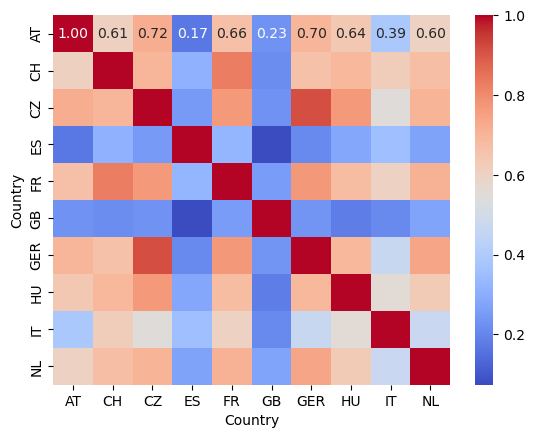

In [49]:
sns.heatmap(one_day_lag_returns[countries].corr(), annot=True, cmap='coolwarm', fmt=".2f")


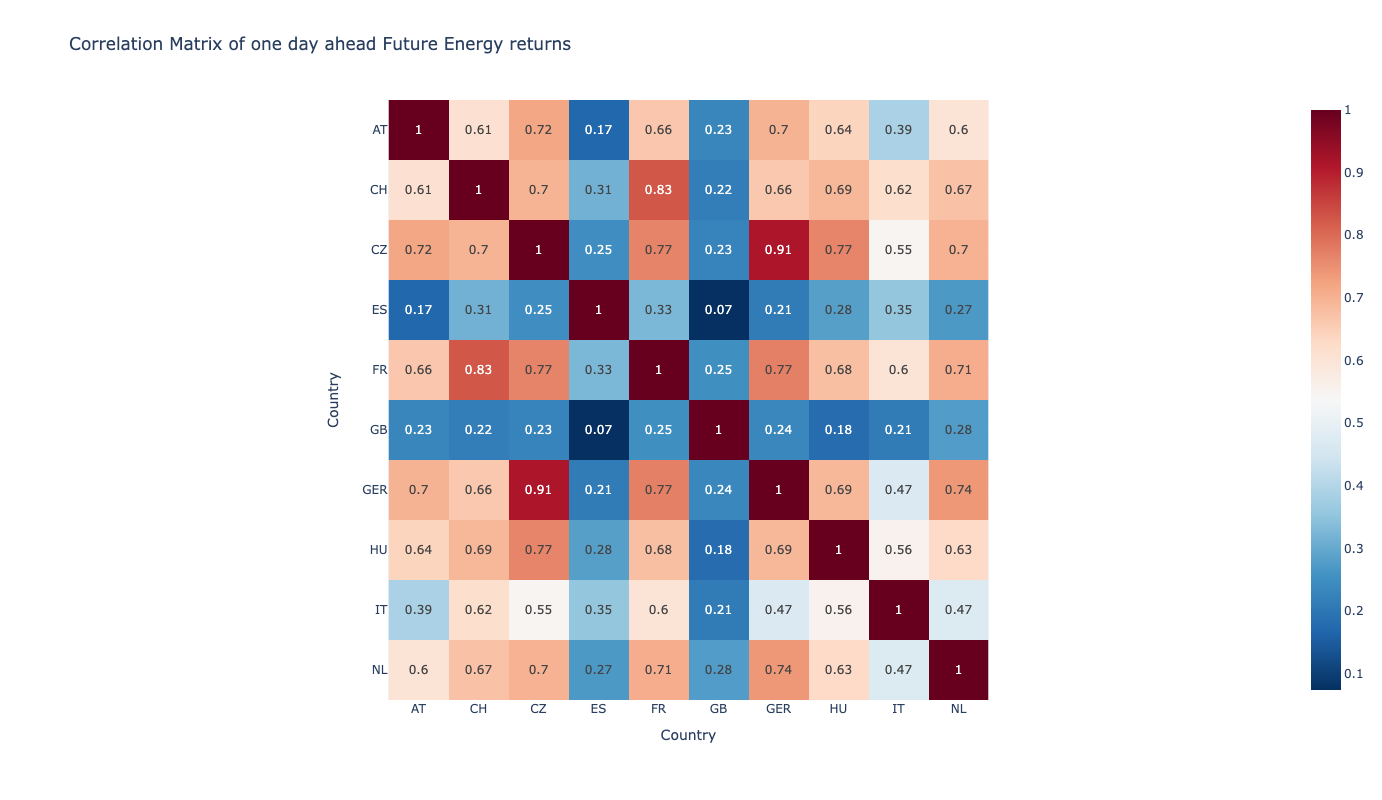

In [52]:
# Plotting the heatmap using Plotly
fig = px.imshow(one_day_lag_returns[countries].corr(),
                color_continuous_scale='RdBu_r',
                title="Correlation Matrix of Time Series Data")

fig.update_traces(text=one_day_lag_returns[countries].corr().values.round(2), texttemplate="%{text}")
fig.update_layout(
    title="Correlation Matrix of one day ahead Future Energy returns",
    xaxis_title="Country",
    yaxis_title="Country",
    xaxis_nticks=36,
    autosize=False,
    width=800,   # Adjust the width
    height=800,  # Adjust the height
    margin=dict(l=100, r=100, b=100, t=100),  # Adjust margins to reduce padding
)
fig.show()

# Distribution of returns

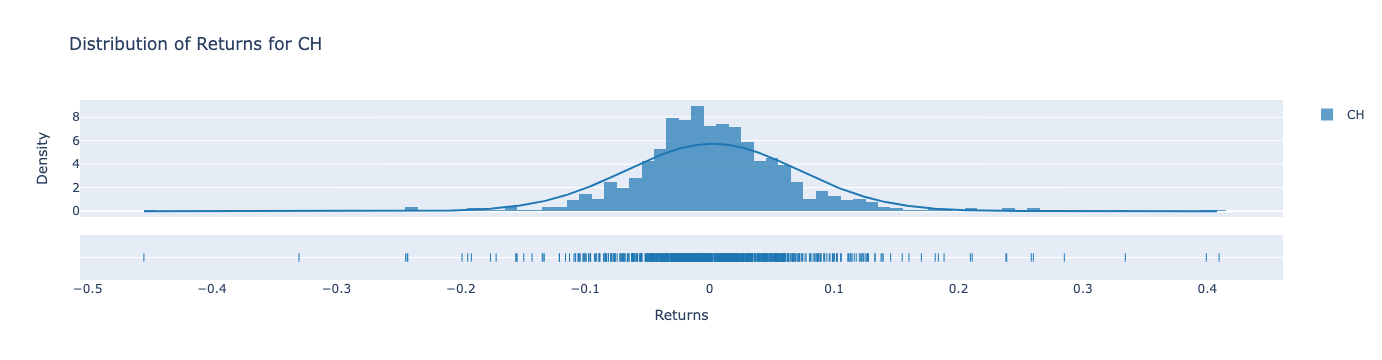

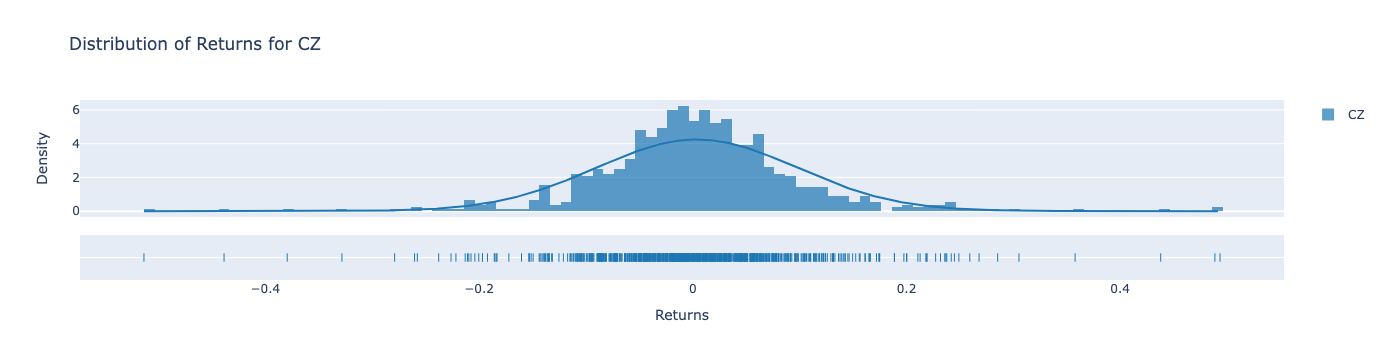

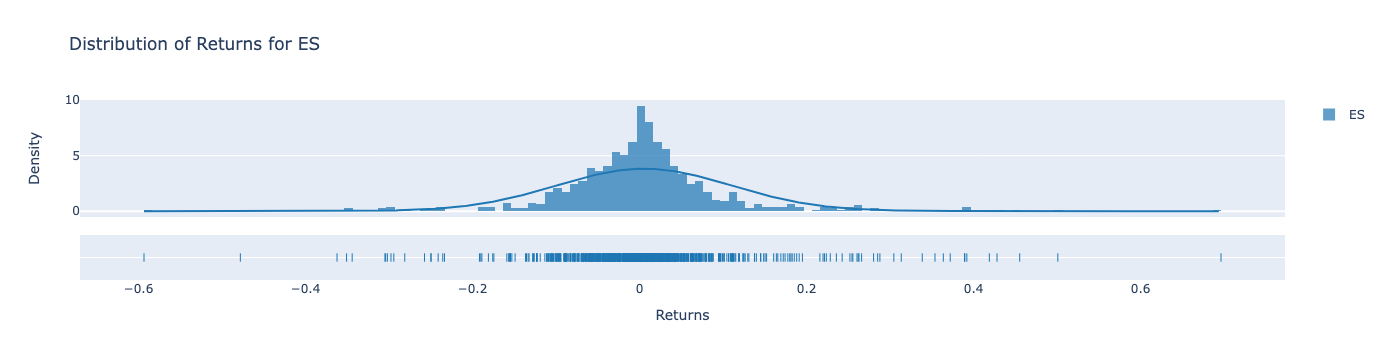

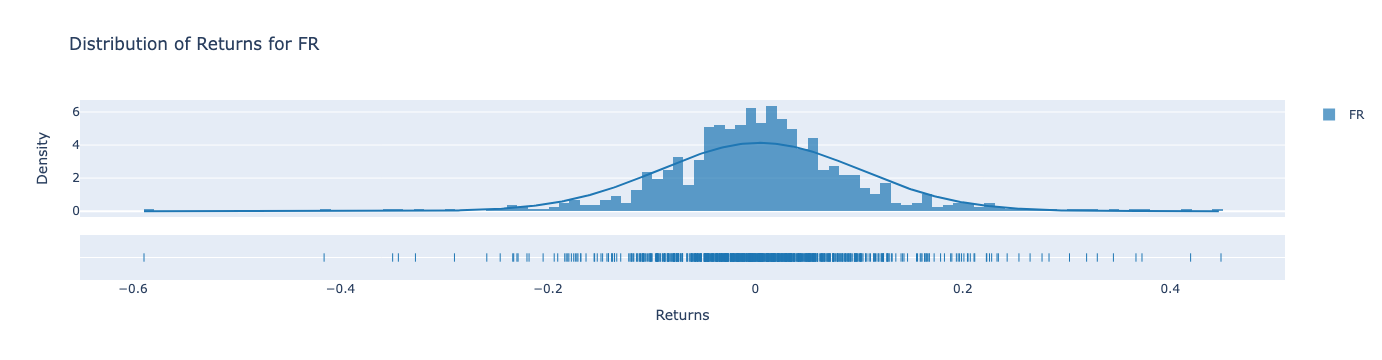

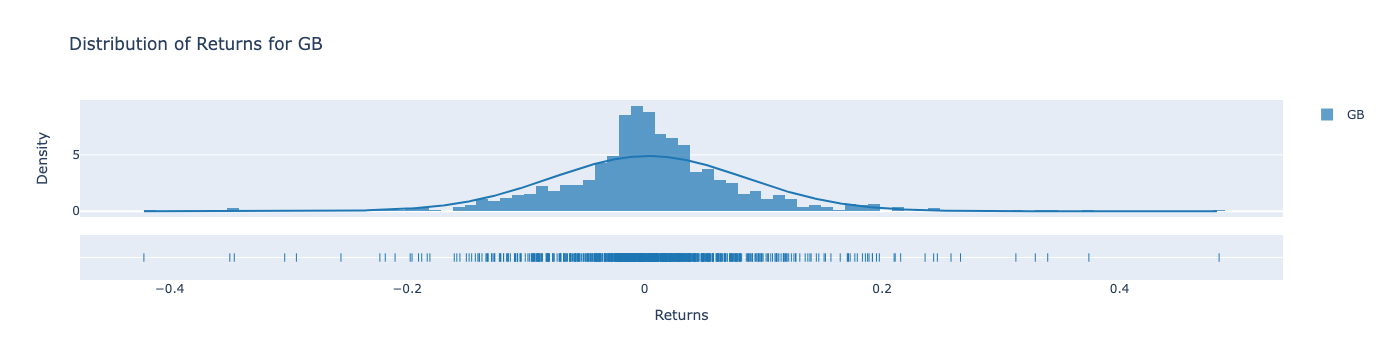

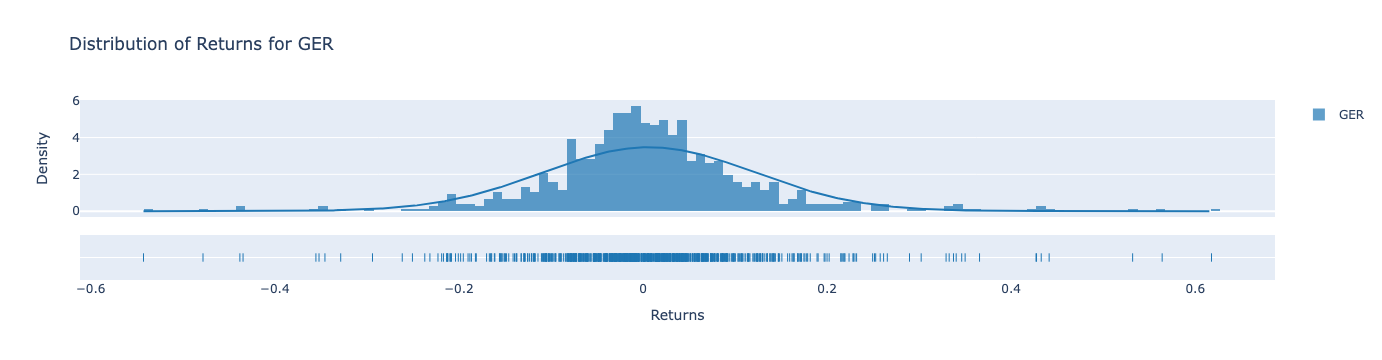

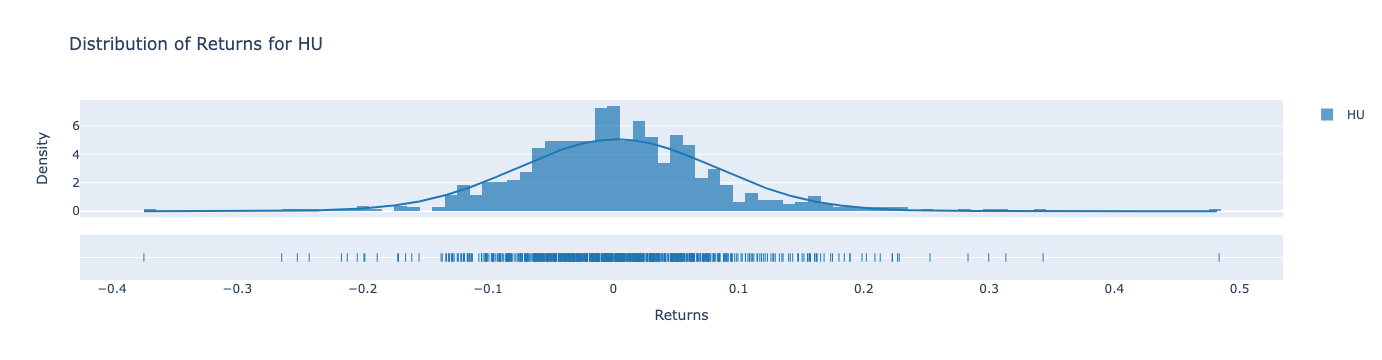

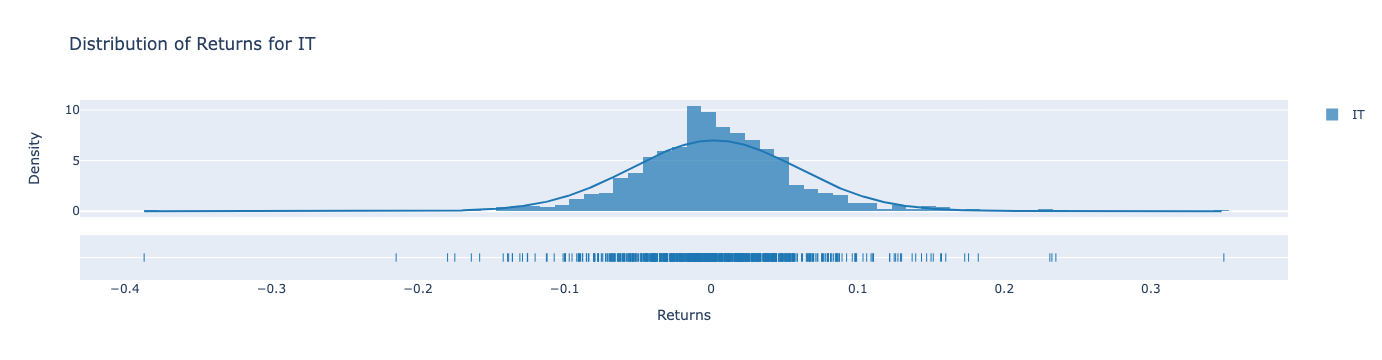

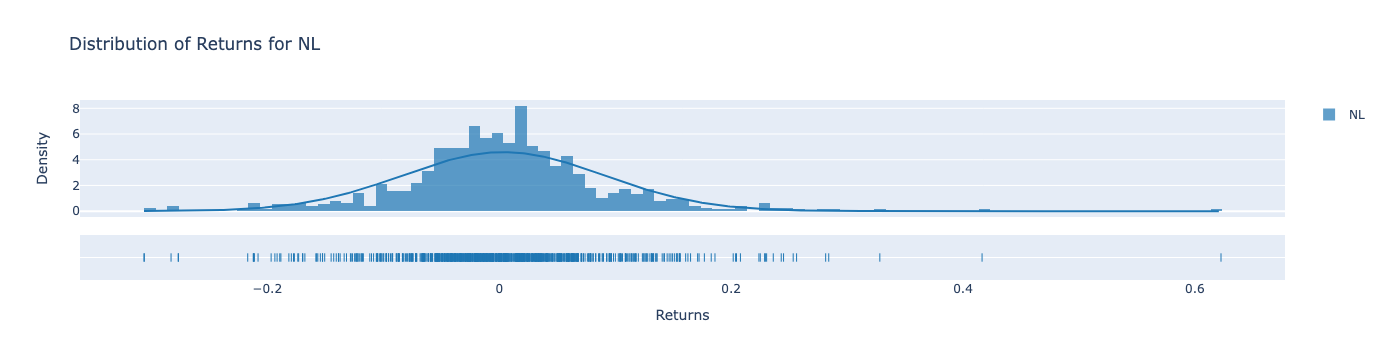

In [59]:
# Assuming `one_day_lag_returns` is your DataFrame
countries = one_day_lag_returns.columns[2:]  # Skip 'Trading Day' column

# Create a plot for each country
for country in countries:
    data = one_day_lag_returns[country].dropna()  # Drop missing values
    
    # Create a normal distribution curve
    mu, std = norm.fit(data)
    x = np.linspace(min(data), max(data), 100)
    p = norm.pdf(x, mu, std)
    
    # Create the distribution plot
    hist_data = [data]
    group_labels = [country]
    
    fig = ff.create_distplot(hist_data, group_labels, bin_size=0.01, curve_type='normal')
    #fig.add_trace(go.Scatter(x=x, y=p, mode='lines', name=f'Normal Fit ({country})'))
    
    fig.update_layout(title=f'Distribution of Returns for {country}', 
                      xaxis_title='Returns', 
                      yaxis_title='Density')
    fig.show()

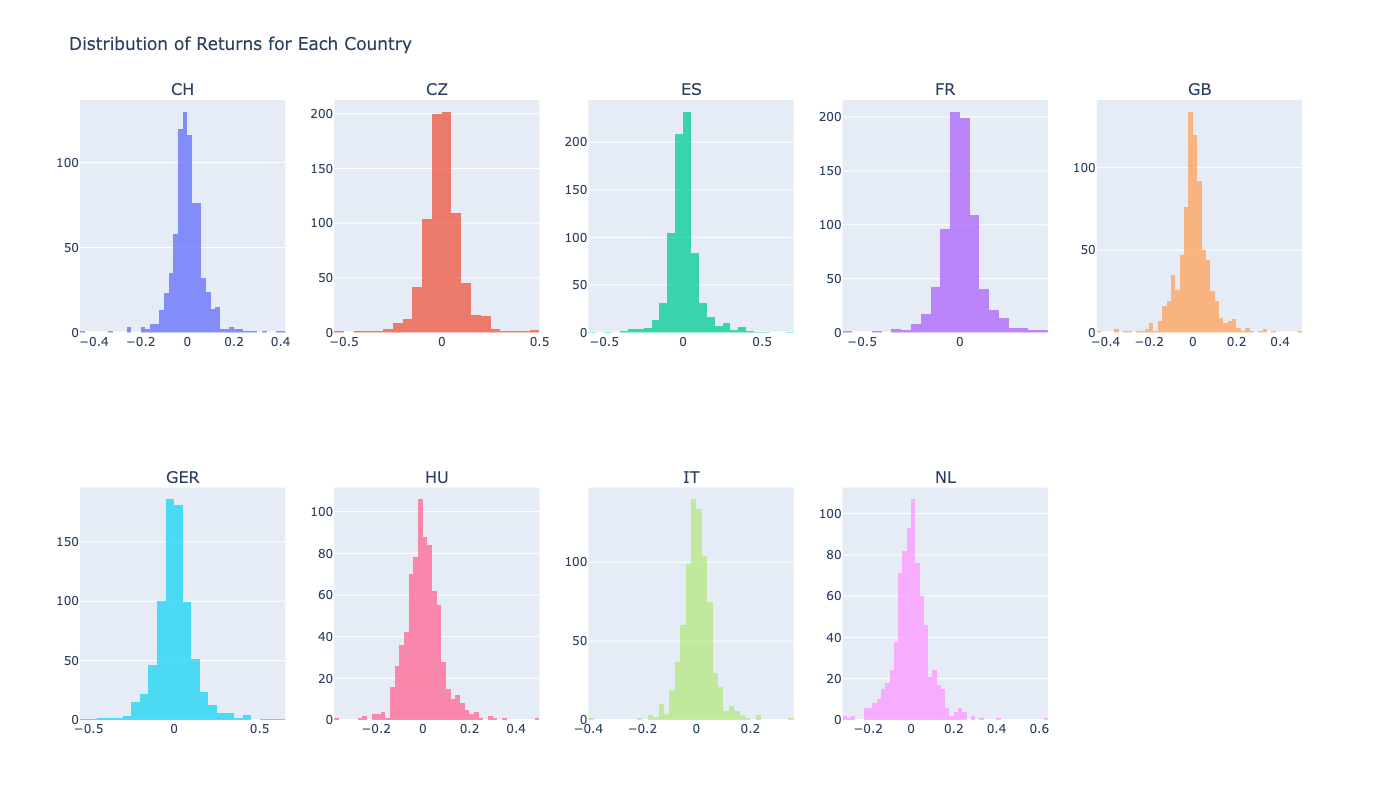

In [62]:
# Create a 2x5 subplot
fig = make_subplots(rows=2, cols=5, subplot_titles=countries)

# Loop through each country and add the histogram with normal fit to the subplot
for i, country in enumerate(countries):
    data = one_day_lag_returns[country].dropna()  # Drop missing values
    
    # Create a normal distribution curve
    mu, std = norm.fit(data)
    x = np.linspace(min(data), max(data), 100)
    p = norm.pdf(x, mu, std)
    
    # Create the histogram
    hist_data = [data]
    group_labels = [country]
    
    # Add the histogram to the subplot
    row = i // 5 + 1
    col = i % 5 + 1
    
    fig.add_trace(go.Histogram(x=data, nbinsx=50, name=country, opacity=0.75), row=row, col=col)
    #fig.add_trace(go.Scatter(x=x, y=p, mode='lines', name=f'Normal Fit ({country})', line=dict(color='red')), row=row, col=col)

# Update layout
fig.update_layout(
    height=800, width=1200, title_text="Distribution of Returns for Each Country",
    showlegend=False
)

# Show the figure
fig.show()

In [76]:
countries

['AT', 'CH', 'CZ', 'ES', 'FR', 'GB', 'GER', 'HU', 'IT', 'NL']

In [71]:
countries

['AT', 'CH', 'CZ', 'ES', 'FR', 'GB', 'GER', 'HU', 'IT', 'NL']

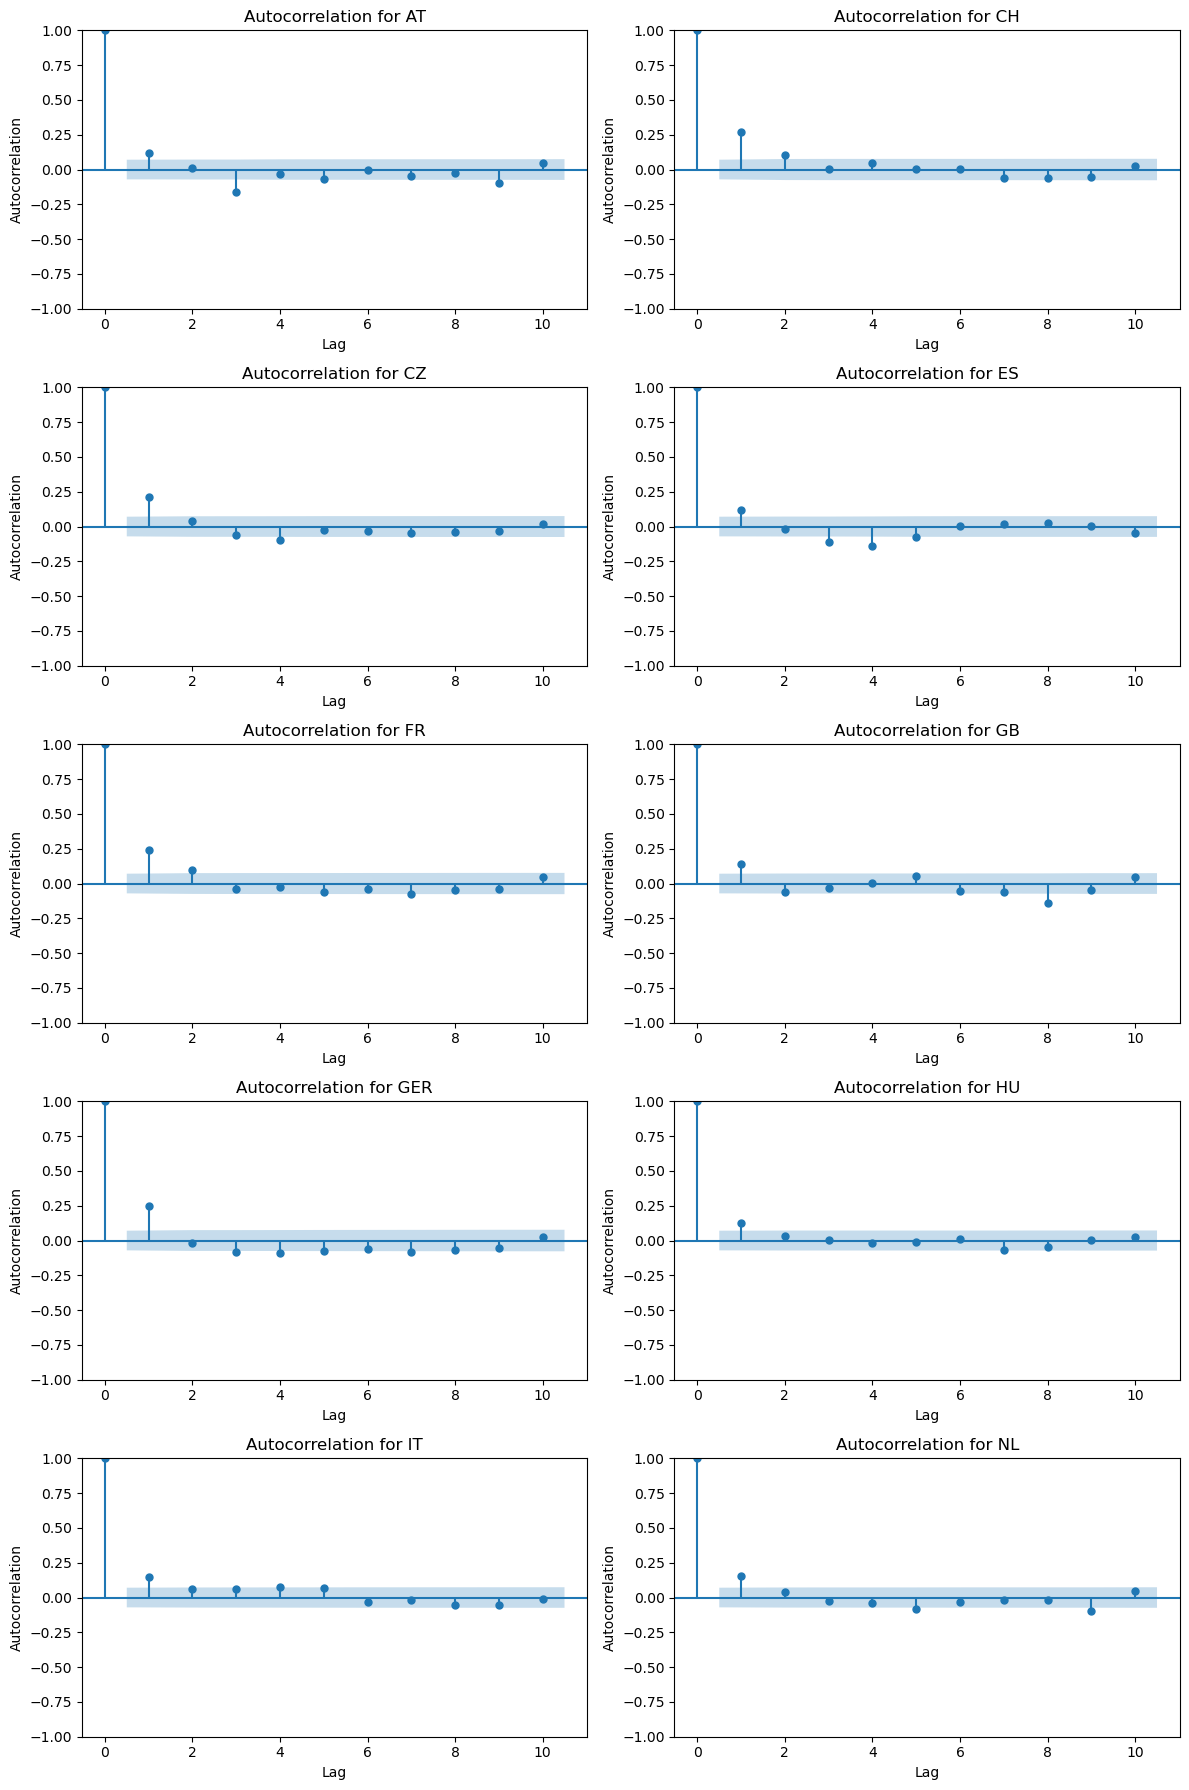

In [77]:
# Plot the autocorrelation function for each country
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 18))

for i, country in enumerate(countries):
    ax = axes[i // 2, i % 2]
    sm.graphics.tsa.plot_acf(one_day_lag_returns[country], lags=10, ax=ax, title=f'Autocorrelation for {country}')
    ax.set_xlabel('Lag')
    ax.set_ylabel('Autocorrelation')

plt.tight_layout()
plt.savefig('Plots/Autocorrelations.pdf')
plt.show()

In [72]:
one_day_lag_returns['AT']

0     -0.014564
1      0.014069
2     -0.021217
3     -0.000544
4      0.004899
         ...   
764    0.364369
765    0.023583
766    0.179155
767   -0.033887
768    0.363804
Name: AT, Length: 769, dtype: float64